# load the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_path = '/content/drive/My Drive/anime_info_final.csv'

In [3]:
import pandas as pd
import numpy as np

# Load the CSV files
df = pd.read_csv(folder_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26440 entries, 0 to 26439
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   26440 non-null  int64  
 1   title        26440 non-null  object 
 2   Type         26440 non-null  object 
 3   Episodes     26440 non-null  object 
 4   Status       26440 non-null  object 
 5   Aired        26440 non-null  object 
 6   Premiered    7874 non-null   object 
 7   Producers    26440 non-null  object 
 8   Licensors    26440 non-null  object 
 9   Studios      26440 non-null  object 
 10  Source       24435 non-null  object 
 11  Genres       11463 non-null  object 
 12  Demographic  9982 non-null   object 
 13  Duration     26440 non-null  object 
 14  Rating       25923 non-null  object 
 15  Score        17197 non-null  float64
 16  Ranked       20647 non-null  object 
 17  Popularity   26440 non-null  object 
 18  Members      26440 non-null  object 
 19  Favo

In [ ]:
df.head()

,Unnamed: 0,title,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,...,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,staff
0,0,Sousou_no_Frieren,['TV'],28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],['Madhouse'],...,"['Adventure', 'Drama', 'Fantasy']",['Shounen'],24 min. per ep.,PG-13 - Teens 13 or older,9.38,#1,#285,"708,753","39,077","['Fukushi, Yuuichirou', 'Taguchi, Shouichirou'..."
1,1,Fullmetal_Alchemist__Brotherhood,['TV'],64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",['Bones'],...,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Shounen'],24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"3,341,090","225,736","['Cook, Justin', 'Maruyama, Hiroo', 'Yonai, No..."
2,2,Steins_Gate,['TV'],24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],['White Fox'],...,"['Drama', 'Sci-Fi', 'Suspense']",NaN,24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"2,560,689","189,417","['Cook, Justin', 'Iwasa, Gaku', 'Kananiwa, Koz..."
3,3,Gintama°,['TV'],51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",['Bandai Namco Pictures'],...,"['Action', 'Comedy', 'Sci-Fi']",['Shounen'],24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#342,"630,081","16,631","['Miyawaki, Chizuru', 'Takamatsu, Shinji', 'Yo..."
4,4,Shingeki_no_Kyojin_Season_3_Part_2,['TV'],10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],['Wit Studio'],...,"['Action', 'Drama', 'Suspense']",['Shounen'],23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"2,272,212","58,534","['Cook, Justin', 'Yabuta, Shuuhei', 'Wada, Jou..."


# clean the data

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()

if duplicates.any():
    print("There are duplicate rows in the concatenated DataFrame.")
else:
    print("There are no duplicate rows in the concatenated DataFrame.")

There are no duplicate rows in the concatenated DataFrame.


In [4]:
# 1. Drop a column
column_to_drop = 'Unnamed: 0'
df = df.drop(columns=[column_to_drop])

In [5]:
df = df.drop(columns = ['title', 'Status', 'Premiered', 'Licensors'])

In [6]:
def process_column(value):
    if pd.isna(value):
        return value
    if isinstance(value, str) and value.startswith('[') and value.endswith(']'):
        return value[1:-1].replace("'", "")
    return value

df = df.applymap(process_column)


In [7]:
df['Ranked'] = df['Ranked'].str.replace('#', '')
df['Popularity'] = df['Popularity'].str.replace('#', '')

### remove ',' and convert the numerical columns from string to float





In [8]:
columns_to_convert = ['Members', 'Favorites', 'Popularity', 'Ranked']

for col in columns_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


In [9]:
df['Episodes'] = pd.to_numeric(df['Episodes'], errors='coerce')
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

df['Members'] = pd.to_numeric(df['Members'], errors='coerce')
df['Favorites'] = pd.to_numeric(df['Favorites'], errors='coerce')
df['Aired'] = df['Aired'].apply(lambda x: x.strip())

In [10]:
import re

def duration_to_seconds(duration):
    # Initialize total_seconds
    total_seconds = 0

    # Check if duration is a string
    if isinstance(duration, str):
        # Regular expressions for hours, minutes, and seconds
        hours_pattern = re.compile(r'(\d+)\s*hr')
        minutes_pattern = re.compile(r'(\d+)\s*min')
        seconds_pattern = re.compile(r'(\d+)\s*sec')

        # Search for hours, minutes, and seconds in the duration string
        hours = hours_pattern.search(duration)
        minutes = minutes_pattern.search(duration)
        seconds = seconds_pattern.search(duration)

        # Convert hours to seconds and add to total
        if hours:
            total_seconds += int(hours.group(1)) * 3600

        # Convert minutes to seconds and add to total
        if minutes:
            total_seconds += int(minutes.group(1)) * 60

        # Add seconds to total
        if seconds:
            total_seconds += int(seconds.group(1))

    return total_seconds


In [11]:
# Apply the duration_to_seconds function to the duration column
df['Duration_minutes'] = df['Duration'].apply(duration_to_seconds)/60.0

In [12]:
df['Episodic'] = df['Duration'].apply(lambda x: 1 if isinstance(x, str) and 'per ep.' in x else (np.nan if pd.isnull(x) else 0))


In [13]:
df.replace('', np.nan, inplace=True)

In [14]:
folder_path_aired = '/content/drive/My Drive/Aired_df.csv'

# Load the CSV files
df_aired = pd.read_csv(folder_path_aired)
df_aired = df_aired.drop(columns=['Aired', 'Unnamed: 0'])

In [15]:
# Concatenate df1 and df2 along columns
df = pd.concat([df, df_aired], axis=1)

In [16]:
# Replace 'not available' with np.nan in 'start_aired' column
df['Start_Aired'] = df['Start_Aired'].replace('not available', np.nan)

# Replace '-' with '0' in 'start_aired' column
df['Start_Aired'] = df['Start_Aired'].str.replace('-', '0')

# Convert 'start_aired' column to datetime format
df['Start_Aired'] = pd.to_datetime(df['Start_Aired'], format='%Y/%m/%d', errors='coerce')


In [17]:
# Replace 'not available' and '?' with np.nan in 'End_Aired' column
df['End_Aired'] = df['End_Aired'].replace('not available', np.nan)
#df['End_Aired'] = df['End_Aired'].replace('?', np.nan)

# Replace '-' with '0' in 'End_Aired' column
df['End_Aired'] = df['End_Aired'].str.replace('-', '0')

# Convert 'End_Aired' column to datetime format
df['End_Aired'] = pd.to_datetime(df['End_Aired'], format='%Y/%m/%d', errors='coerce')


In [18]:
df.dropna(subset=['Episodes'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25908 entries, 0 to 26439
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Type              21993 non-null  object        
 1   Episodes          25908 non-null  float64       
 2   Aired             25908 non-null  object        
 3   Producers         25908 non-null  object        
 4   Studios           25908 non-null  object        
 5   Source            24139 non-null  object        
 6   Genres            11188 non-null  object        
 7   Demographic       9808 non-null   object        
 8   Duration          25908 non-null  object        
 9   Rating            25553 non-null  object        
 10  Score             17084 non-null  float64       
 11  Ranked            20460 non-null  float64       
 12  Popularity        25908 non-null  float64       
 13  Members           25908 non-null  float64       
 14  Favorites         25908 non

## Analysing the relation between the columns

In [ ]:
# Create a boolean Series where True indicates rows where 'Episodes' is 1
episodes_is_one = df['Episodes'] == 1

# Create a boolean Series where True indicates rows where 'Aired' contains 'to'
aired_contains_to = df['Aired'].astype('str').str.contains('to')

# Combine the two Series using the bitwise AND operator (&)
# This will give a Series where True indicates rows where 'Episodes' is 1 AND 'Aired' contains 'to'
invalid_rows = episodes_is_one & aired_contains_to

# Print the invalid rows
print(df[invalid_rows])

          Type  Episodes                         Aired  \
4682   Special       1.0  Sep 21, 2008 to Nov 23, 2008   
4862   Special       1.0  Jul 30, 2008 to Aug 11, 2008   
10501    Movie       1.0                 Feb 1917 to ?   
12313    Movie       1.0                 Jan 1917 to ?   
13621    Movie       1.0                     2021 to ?   
13666    Movie       1.0             Jul 20, 2023 to ?   
14856    Movie       1.0  Feb 10, 2024 to Jan 10, 2024   
15666    Movie       1.0             Jul 22, 2023 to ?   
16002      OVA       1.0             Jul 21, 1991 to ?   
16075      OVA       1.0  Feb 10, 2008 to Feb 11, 2008   
16224    Movie       1.0              Oct 7, 1917 to ?   
16390    Movie       1.0              Aug 4, 2017 to ?   
17079      ONA       1.0             Feb 14, 2023 to ?   
17661      OVA       1.0                     2006 to ?   
17677    Movie       1.0              Sep 9, 1917 to ?   
18558    Movie       1.0             Jul 20, 2004 to ?   
19065    Movie

so whenever there is 'to' in Aired column the anime is episodic

In [19]:
# Create a boolean Series where True indicates rows where 'Episodes' is 1
episodes_is_one = df['Episodes'] == 1

# Create a boolean Series where True indicates rows where 'Duration' contains 'per ep.'
duration_contains_per_ep = df['Duration'].str.contains('per ep.')

# Combine the two Series using the bitwise AND operator (&)
# This will give a Series where True indicates rows where 'Episodes' is 1 AND 'Duration' contains 'per ep.'
invalid_rows = episodes_is_one & duration_contains_per_ep

# Print the invalid rows
print(df[invalid_rows])


Empty DataFrame
Columns: [Type, Episodes, Aired, Producers, Studios, Source, Genres, Demographic, Duration, Rating, Score, Ranked, Popularity, Members, Favorites, staff, Duration_minutes, Episodic, Start_Aired, End_Aired, Valid_Format]
Index: []

[0 rows x 21 columns]


so whenever there is 'per ep.' in Duration column the anime is episodic

In [ ]:
# Count the number of strings that contain 'to ?'
count_to_question = df['Aired'].str.contains('to \?', regex=True).sum()
print(f"Number of strings that contain 'to ?': {count_to_question}")

# Count the number of strings that contain '?'
count_question = df['Aired'].str.contains('\?', regex=True).sum()
print(f"Number of strings that contain '?': {count_question}")


Number of strings that contain 'to ?': 1554
Number of strings that contain '?': 1554


so in Aired column there is '?' just in the End_Aired

In [ ]:
print(df[df['Aired'].str.contains('\?', regex=True)])

        Type  Episodes              Aired  \
72        TV      13.0   Apr 7, 2024 to ?   
116       TV      11.0  Apr 10, 2024 to ?   
155       TV      12.0   Apr 4, 2024 to ?   
158    Movie       2.0  Feb 16, 2024 to ?   
220       TV      12.0   Apr 8, 2024 to ?   
...      ...       ...                ...   
24077    NaN       4.0      Oct 2024 to ?   
24243    ONA       6.0          2024 to ?   
24378  Movie       3.0   Sep 6, 2024 to ?   
24782  Movie       1.0          2024 to ?   
24802     TV      12.0   Jul 4, 2024 to ?   

                                               Producers          Studios  \
72     Lantis, Pony Canyon, Rakuonsha, ABC Animation,...  Kyoto Animation   
116    Half H.P Studio, Nippon Columbia, 81 Produce, ...            Drive   
155    Sotsu, Half H.P Studio, AT-X, KlockWorx, Houbu...             8bit   
158                             TOHO animation, Shueisha   Production I.G   
220    Frontier Works, TOHO animation, Hakuhodo DY Mu...      Studio Bind 

## unique values for each column

In [ ]:
# Suppose 'Genres' and 'Actors' are the columns you want to find unique values for
columns_to_explode = ['Genres']

for col in columns_to_explode:
    unique_values = df[col].str.split(', ').explode().unique()
    print(f"Unique values in {col}: {unique_values}")


Unique values in Genres: ['Adventure' 'Drama' 'Fantasy' 'Action' 'Sci-Fi' 'Suspense' 'Comedy'
 'Romance' 'Supernatural' 'Award Winning' 'Mystery' nan 'Sports'
 'Slice of Life' 'Ecchi' 'Horror' 'Avant Garde' 'Boys Love' 'Gourmet'
 'Girls Love' 'Hentai' 'Erotica']


In [ ]:
# Suppose 'Rating' is the name of your column
unique_values = df['Rating'].unique()

print(unique_values)


['PG-13 - Teens 13 or older' 'R - 17+ (violence & profanity)'
 'R+ - Mild Nudity' 'PG - Children' 'G - All Ages' nan 'Rx - Hentai']


In [ ]:
# Suppose 'Type' is the name of your column
unique_values = df['Type'].unique()

print(unique_values)

['TV' 'Movie' 'OVA' 'TV Special' 'ONA' 'Special' nan]


**TV**: This refers to anime series that are broadcast on television1. They are often based on manga (Japanese comics), but can also have unique or original source material.

**Movie**: These are animated films that are typically released in theaters1. Like TV anime, they can be based on manga or have original source material.

**OVA (Original Video Animation)**: These are special episodes made separately from the rest of the season episodes2. They are sometimes shorter or longer than regular episodes and are made for home video formats like DVD and Blu-ray2. OVAs can provide backstories for characters, side adventures, or new perspectives on the main plot.

**TV Special**: These are anime episodes that are produced for television and, while they may be associated with a franchise or TV series, they typically tell a standalone story that can be consumed by itself.

**ONA (Original Net Animation)**: These are anime episodes that are directly released onto the Internet56. They can later be distributed on TV channels once they have been out on the internet.

**Special**: This term is often used to refer to episodes that are not part of the main series but provide additional content. They can be broadcasted on TV or released as home videos.

In [ ]:
# Suppose 'Source' is the name of your column
unique_values = df['Source'].unique()

print(unique_values)

['Manga' 'Visual novel' 'Novel' 'Light novel' 'Original' '4-koma manga'
 'Web manga' 'Web novel' 'Game' 'Other' 'Mixed media' 'Book' 'Unknown'
 'Music' 'Picture book' 'Card game' 'Radio' nan]


In the context of anime, the "Source" refers to the original material or medium from which the anime adaptation is derived. Here’s what each unique value typically means:

1. **Manga**:
   - Japanese comic books or graphic novels. Many anime series are adaptations of popular manga series.

2. **Visual Novel**:
   - A type of interactive game featuring mostly static graphics, usually with anime-style art, where the player reads through a story and makes choices that affect the outcome.

3. **Novel**:
   - Traditional written works of fiction. These are standard novels, not specifically targeted as "light novels."

4. **Light Novel**:
   - A style of Japanese novel primarily targeting middle and high school students. These are often shorter than traditional novels and include manga-style illustrations.

5. **Original**:
   - Anime that is not based on any pre-existing material and is an original creation for the anime format.

6. **4-koma Manga**:
   - A type of manga that is divided into four panels of equal size arranged vertically. These are typically comedic or slice-of-life stories.

7. **Web Manga**:
   - Manga that is published on the internet, usually on specific web platforms or personal websites.

8. **Web Novel**:
   - Novels that are published online, often on user-generated content platforms. They may be serialized and can later be published as light novels if they gain popularity.

9. **Game**:
   - Video games, including role-playing games (RPGs), visual novels, and other types of interactive entertainment that have been adapted into anime.

10. **Other**:
    - Sources that don’t fit neatly into any of the standard categories, such as unique or hybrid media types.

11. **Mixed Media**:
    - Projects that are part of a multimedia franchise involving various forms of media like manga, anime, games, and novels developed simultaneously.

12. **Book**:
    - General books that might not fit the categories of novels or light novels, possibly including non-fiction or special interest books.

13. **Unknown**:
    - The source material is not known or not specified.

14. **Music**:
    - Anime that is based on or inspired by music, musical groups, or music videos. These are often promotional projects for musical artists.

15. **Picture Book**:
    - Illustrated books intended for young children, with a narrative told primarily through pictures and some text.

16. **Card Game**:
    - Anime based on collectible or trading card games, where the narrative might be derived from the lore or gameplay of the card game.

17. **Radio**:
    - Anime that is adapted from radio dramas or audio plays.

18. **nan**:
    - This is a placeholder indicating missing data in the dataset, often used in pandas DataFrames to denote "Not a Number" or missing values.

In [ ]:
# Suppose 'Demographic' is the name of your column
unique_values = df['Demographic'].unique()

print(unique_values)

['Shounen' nan 'Seinen' 'Shoujo' 'Josei' 'Kids']


In the context of anime, "demographic" refers to the target audience for which the anime is intended. Each demographic category often corresponds to specific themes, art styles, and storytelling methods that appeal to that group. Here are the unique values you mentioned:

1. **Shounen**:
   - Target Audience: Young boys, typically aged 12-18.
   - Characteristics: Action-packed, adventurous stories with male protagonists. Common themes include friendship, rivalry, and personal growth. Popular shounen anime include "Naruto," "One Piece," and "Dragon Ball."

2. **nan**:
   - This indicates missing data in the dataset, often used in pandas DataFrames to denote "Not a Number" or missing values. It means that the demographic information is not available for those entries.

3. **Seinen**:
   - Target Audience: Adult men, typically aged 18-40.
   - Characteristics: More mature and complex themes, often featuring more realistic art styles and more detailed character development. Topics can range from psychological and philosophical themes to crime and politics. Examples include "Berserk," "Tokyo Ghoul," and "Ghost in the Shell."

4. **Shoujo**:
   - Target Audience: Young girls, typically aged 10-18.
   - Characteristics: Romantic and emotional stories with female protagonists. Common themes include romance, personal relationships, and coming-of-age stories. Notable shoujo anime include "Sailor Moon," "Fruits Basket," and "Ouran High School Host Club."

5. **Josei**:
   - Target Audience: Adult women, typically aged 18-40.
   - Characteristics: More realistic and mature stories focused on romantic relationships, professional lives, and personal growth of adult women. Examples include "Nana," "Paradise Kiss," and "Honey and Clover."

6. **Kids**:
   - Target Audience: Young children, typically aged 2-11.
   - Characteristics: Simple, colorful, and educational content designed to entertain and teach young children. Themes often include friendship, adventure, and basic moral lessons. Examples include "Pokémon," "Doraemon," and "Anpanman."

Understanding these demographics helps in identifying the style and content of the anime and how it may appeal to different audiences based on age and gender.

The roles of a producer and a licensor in the context of media, such as film, television, and anime, are distinct but can sometimes overlap. Here’s a breakdown of their differences:

### Producer

1. **Role and Responsibilities**:
   - A producer is primarily responsible for overseeing the creation, development, and production of a media project. This includes securing funding, hiring key personnel (directors, writers, cast), managing budgets, and ensuring the project stays on schedule.
   - Producers are involved in the creative and logistical aspects of production, from the initial concept through to the final product.
   - They often work closely with the director and other creative talents to shape the vision and direction of the project.

2. **Involvement**:
   - Producers are deeply involved in the day-to-day operations of making a film, TV show, or anime. They handle challenges that arise during production and make critical decisions that affect the outcome of the project.

3. **Types of Producers**:
   - There are various types of producers, such as executive producers, co-producers, line producers, and associate producers, each with specific roles and responsibilities within the production process.

### Licensor

1. **Role and Responsibilities**:
   - A licensor is typically a company or entity that owns the rights to a particular intellectual property (IP) and grants permission to another party to use, distribute, or produce content based on that IP.
   - This can include rights to distribute a film, TV show, or anime in different regions, produce merchandise, create adaptations, or use characters and settings in other media.

2. **Involvement**:
   - Licensors are primarily concerned with the legal and financial aspects of managing and monetizing their IP. They may not be directly involved in the production process but have a say in how their property is used.
   - They ensure that their IP is used in a way that aligns with their brand and business objectives, often providing guidelines and approvals for how their IP is portrayed.

3. **Examples**:
   - A licensor might be a major studio that owns the rights to a film and licenses it to streaming platforms or international distributors.
   - In anime, companies like Aniplex or Funimation may license the rights to distribute an anime series outside of Japan.

### Key Differences

- **Scope of Work**:
  - Producers are hands-on with the creative and production processes.
  - Licensors focus on the management and monetization of IP rights.

- **Involvement in Production**:
  - Producers are directly involved in making the content.
  - Licensors may not be involved in the production but oversee how their IP is used and distributed.

- **Decision-Making**:
  - Producers make decisions that affect the production and creative direction of a project.
  - Licensors make decisions regarding the use and licensing of their IP, ensuring it adheres to their standards and business strategies.

In summary, producers are creators and managers of the content, while licensors are guardians and monetizers of the intellectual property rights associated with that content.

## Find missing values

In [ ]:
# Find the number and fraction of missing values for all columns
missing_values = df.isna().sum()

print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
Type                 3915
Episodes                0
Aired                   0
Producers               0
Studios                 0
Source               1769
Genres              14720
Demographic         16100
Duration                0
Rating                355
Score                8824
Ranked               5448
Popularity              0
Members                 0
Favorites               0
staff                8203
Duration_minutes        0
Episodic                0
Start_Aired          4621
End_Aired           15991
Valid_Format            0
dtype: int64


In [ ]:
# Find the number and fraction of 'add some' in all columns
add_some_values = df.apply(lambda x: x.str.contains('add some').sum() if x.dtype == "object" else 0)


print("\nNumber of 'add some' for each column:")
print(add_some_values)


Number of 'add some' for each column:
Type                    0
Episodes                0
Aired                   0
Producers           13770
Studios             10813
Source                  0
Genres                  0
Demographic             0
Duration                0
Rating                  0
Score                   0
Ranked                  0
Popularity              0
Members                 0
Favorites               0
staff                   0
Duration_minutes        0
Episodic                0
Start_Aired             0
End_Aired               0
Valid_Format            0
dtype: int64


In [ ]:
print(df.iloc[10504]['staff'])
print(pd.isnull(df.iloc[10504]['staff']))
print(df.iloc[10504]['staff'] == '')


Fujiyama, Fusanobu
False
False


In [20]:
df.replace('', np.nan, inplace=True)

In [ ]:
# Find the number and fraction of 'Unknown' in all columns
add_some_values = df.apply(lambda x: x.str.contains('Unknown').sum() if x.dtype == "object" else 0)

print("\nNumber of 'Unknown' for each column:")
print(add_some_values)



Number of 'Unknown' for each column:
Type                   0
Episodes               0
Aired                  0
Producers              0
Studios                0
Source              2940
Genres                 0
Demographic            0
Duration             321
Rating                 0
Score                  0
Ranked                 0
Popularity             0
Members                0
Favorites              0
staff                  0
Duration_minutes       0
Episodic               0
Start_Aired            0
End_Aired              0
Valid_Format           0
dtype: int64


In [ ]:
# Find the number and fraction of 'Unknown' in all columns
add_some_values = df.apply(lambda x: x.str.contains('\?').sum() if x.dtype == "object" else 0)

print("\nNumber of '?' for each column:")
print(add_some_values)


Number of '?' for each column:
Type                   0
Episodes               0
Aired               1554
Producers              0
Studios                0
Source                 0
Genres                 0
Demographic            0
Duration               0
Rating                 0
Score                  0
Ranked                 0
Popularity             0
Members                0
Favorites              0
staff                  2
Duration_minutes       0
Episodic               0
Start_Aired            0
End_Aired              0
Valid_Format           0
dtype: int64


In [21]:
import numpy as np

df.replace('Unknown', np.nan, inplace=True)
df.replace('add some', np.nan, inplace=True)

In [22]:
# Find the number and fraction of missing values for all columns
missing_values = df.isna().sum()

print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
Type                 3915
Episodes                0
Aired                   0
Producers           13770
Studios             10813
Source               4709
Genres              14720
Demographic         16100
Duration              321
Rating                355
Score                8824
Ranked               5448
Popularity              0
Members                 0
Favorites               0
staff                8203
Duration_minutes        0
Episodic                0
Start_Aired          4621
End_Aired           15991
Valid_Format            0
dtype: int64


## drop some columns or rows



we have extracted usfull data from some columns and save them as new columns so we drop the original ones

also we drop the columns that are useless by itself

In [23]:
df.drop(['Aired', 'Valid_Format', 'Duration'], axis=1, inplace=True)

we drop the columns with alot of null values (with high percentages based on the number of rows)

We are going to predict the Score in our data set so the rows are missing the Score values have to be removed.(we would not use label propagation because the size of our data set is large enough)

In [25]:
df.dropna(subset=['Score'], inplace=True)


we drop 'status' column because majarity of the data in this column is just one category so it does not differ between data points and does not provide any useful insights to the analysis

Status
Finished Airing     17014
Currently Airing      183
Name: count, dtype: int64


Also we must remove the columns that have invalid data such zero.

For example zero number of Favorites does not make senece when the other number of Favorites are in order of thousands

In [26]:
# Find the number of zeros for all columns
zero_values = (df == 0).sum()

print("Number of zero values for each column:")
print(zero_values)

Number of zero values for each column:
Type                   0
Episodes               0
Producers              0
Studios                0
Source                 0
Genres                 0
Demographic            0
Rating                 0
Score                  0
Ranked                 0
Popularity             0
Members                0
Favorites           3560
staff                  0
Duration_minutes      11
Episodic            8174
Start_Aired            0
End_Aired              0
dtype: int64


In [27]:
df = df.drop(columns=['Favorites'])

The zero in Duration_minutes is when the Duration is null and since the number is rather samll according to the size of out data set we do not remove this important column

In [28]:
df = df[df['Duration_minutes'] != 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17197 entries, 0 to 26439
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             17197 non-null  object        
 1   Type              14843 non-null  object        
 2   Episodes          17084 non-null  object        
 3   Producers         10354 non-null  object        
 4   Studios           13247 non-null  object        
 5   Source            14634 non-null  object        
 6   Genres            9205 non-null   object        
 7   Demographic       4681 non-null   object        
 8   Rating            17109 non-null  object        
 9   Score             17197 non-null  float64       
 10  Ranked            13347 non-null  float64       
 11  Popularity        17197 non-null  float64       
 12  Members           17197 non-null  float64       
 13  staff             15016 non-null  object        
 14  Duration_minutes  17197 non

We also have to remove some rows that have null values in more than 9 columns

In [ ]:
# Assuming df is your DataFrame
num_columns = df.shape[1]

print(f"The DataFrame has {num_columns} columns.")

# Count the number of nulls in each row
null_counts = df.isnull().sum(axis=1).value_counts()

# Print the result
for null_count, row_count in null_counts.items():
    print(f"{null_count} null = {row_count} rows")


The DataFrame has 18 columns.
1 null = 3417 rows
2 null = 3357 rows
3 null = 2824 rows
4 null = 2091 rows
5 null = 1605 rows
6 null = 1390 rows
0 null = 1256 rows
7 null = 955 rows
8 null = 265 rows
9 null = 34 rows
10 null = 3 rows


In [ ]:
# Assuming df is your DataFrame
df = df.dropna(thresh=df.shape[1]-8)


In [29]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Extract season from 'Aired_Start'
df['Aired_Season'] = df['Start_Aired'].dt.month.apply(get_season)

In [30]:
df['Aired_Day_of_Week'] = df['Start_Aired'].dt.day_name()

In [31]:
df['Aired_Month'] = df['Start_Aired'].dt.month_name()


In [32]:
folder_path = '/content/drive/My Drive/cleaned_1_anime (3).csv'
df_cleaned = pd.read_csv(folder_path)
df['Aired_Year'] = df_cleaned['Aired_Year']

In [33]:
df['Aired_Year'] = pd.to_numeric(df['Aired_Year'], errors='coerce')

In [34]:
df['End_Aired'] = df['End_Aired'].replace('?', np.nan)
df['Start_Aired'] = df['Start_Aired'].replace('?', np.nan)

After all of the droping the rows, we must reset the index to match the number of updated rows

In [35]:
# Assuming df is your DataFrame
df = df.reset_index(drop=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17037 entries, 0 to 17036
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Type               14728 non-null  object        
 1   Episodes           17037 non-null  float64       
 2   Producers          10281 non-null  object        
 3   Studios            13142 non-null  object        
 4   Source             14525 non-null  object        
 5   Genres             9162 non-null   object        
 6   Demographic        4657 non-null   object        
 7   Rating             16951 non-null  object        
 8   Score              17037 non-null  float64       
 9   Ranked             13277 non-null  float64       
 10  Popularity         17037 non-null  float64       
 11  Members            17037 non-null  float64       
 12  staff              14909 non-null  object        
 13  Duration_minutes   17037 non-null  float64       
 14  Episod

## Handel and fill the missing values

In [ ]:
df.isna().sum()

title                   0
Type                 2319
Episodes              112
Producers            6806
Studios              3913
Source               2537
Genres               7956
Demographic         12479
Rating                 87
Score                   0
Ranked               3814
Popularity              0
Members                 0
staff                2150
Duration_minutes        0
Episodic                0
Start_Aired          1039
End_Aired            8925
dtype: int64

In [ ]:
df[df['Genres'].isna()]

,title,Type,Episodes,Producers,Studios,Source,Genres,Demographic,Rating,Score,Ranked,Popularity,Members,staff,Duration_minutes,Episodic,Start_Aired,End_Aired
18,3-gatsu_no_Lion_2nd_Season,TV,22,"Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace, ""...",Shaft,Manga,NaN,Seinen,PG-13 - Teens 13 or older,8.92,19.0,567.0,401854.0,"Ooshima, Miku, Oota, Kyouko, Shinbou, Akiyuki,...",25.0,1,2017-10-14,2018-03-31
29,Kingdom_3rd_Season,TV,26,Shueisha,"Pierrot, Studio Signpost",Manga,NaN,Seinen,R - 17+ (violence & profanity),8.82,30.0,2032.0,103136.0,"Cook, Justin, Herek, Samantha, Imaizumi, Kenic...",25.0,1,2020-04-06,2021-10-17
32,Bocchi_the_Rock,TV,12,"Aniplex, Houbunsha",CloverWorks,4-koma manga,NaN,NaN,PG-13 - Teens 13 or older,8.79,33.0,386.0,565272.0,"Umehara, Shouta, Kobayashi, Hiroyuki, Saitou, ...",23.0,1,2022-10-09,2022-12-25
36,Haikyuu_Karasuno_Koukou_vs_Shiratorizawa_Gakue...,TV,10,"Dentsu, Mainichi Broadcasting System, Movic, S...",Production I.G,Manga,NaN,Shounen,PG-13 - Teens 13 or older,8.78,37.0,117.0,1200809.0,"Maeda, Toshihiro, Morihiro, Fumi, Matsushita, ...",24.0,1,2016-10-08,2016-12-10
40,Hajime_no_Ippo,TV,75,VAP,Madhouse,Manga,NaN,Shounen,PG-13 - Teens 13 or older,8.77,41.0,368.0,592482.0,"Maruyama, Masao, Tamura, Manabu, Nishimura, Sa...",23.0,1,2000-10-04,2002-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17153,Chu^2,OVA,1,BEAM Entertainment,Studio B&M,NaN,NaN,NaN,Rx - Hentai,4.91,NaN,11698.0,1806.0,"Toyooka, Kaoru",24.0,0,1997-10-25,NaT
17154,Sei_Michaela_Gakuen_Hyouryuuki,OVA,2,NaN,Visual 80,NaN,NaN,NaN,R+ - Mild Nudity,4.91,NaN,12000.0,1608.0,"van Beethoven, Ludwig, Asamiya, Kia, Tomizawa,...",37.0,1,1990-06-22,1991-07-25
17155,Under_World,OVA,1,Five Ways,NaN,NaN,NaN,NaN,Rx - Hentai,4.91,NaN,14387.0,787.0,NaN,64.0,0,2000-11-18,NaT
17156,GTR_G-cup_Teacher_Rei,OVA,4,"Allure, Mediabank",NaN,NaN,NaN,NaN,Rx - Hentai,4.81,NaN,12495.0,1376.0,NaN,30.0,1,2000-10-13,2004-06-25


We can fill the missing values in categorical columns and columns having object type of data with a new category 'Unknown'

In [36]:
# List of columns to fill
columns_to_fill = ['Type', 'Producers', 'Studios', 'Source', 'Genres', 'Demographic', 'Rating', 'staff']  # replace with your column names

# Fill NaN values in the specified columns with 'Unknown'
for column in columns_to_fill:
    df[column] = df[column].fillna('Unknown')

In [37]:
df['Start_Aired'] = df['Start_Aired'].fillna('Unknown')
df['End_Aired'] = df['End_Aired'].fillna('Unknown')
df['Aired_Day_of_Week'] = df['Aired_Day_of_Week'].fillna('Unknown')
df['Aired_Month'] = df['Aired_Month'].fillna('Unknown')
df['Aired_Season'] = df['Aired_Season'].fillna('Unknown')

In [ ]:
df.isna().sum()

Type                    0
Episodes                0
Producers               0
Studios                 0
Source                  0
Genres                  0
Demographic             0
Rating                  0
Score                   0
Ranked               3760
Popularity              0
Members                 0
staff                   0
Duration_minutes        0
Episodic                0
Start_Aired             0
End_Aired               0
Aired_Season            0
Aired_Day_of_Week       0
Aired_Month             0
Aired_Year           1939
dtype: int64

In [38]:
# Categorize Popularity
df['Popularity_Category'] = pd.qcut(df['Popularity'], q=10, precision=1)

# Categorize Members
df['Members_Category'] = pd.qcut(df['Members'], q=10, precision=1)

# Categorize Duration_Minutes
df['Duration_Minutes_Category'] = pd.qcut(df['Duration_minutes'], q=7, precision=1)



In [39]:
import pandas as pd

# Load the CSV file into a DataFrame

# Function to convert string representation of lists to actual lists
def convert_to_list(genre_str):
    try:
        return genre_str.split(', ')
    except AttributeError:
        # Handle cases where genre_str is not a string
        return []

# Apply the function to the 'Genres' column
df['Genres'] = df['Genres'].apply(convert_to_list)

# Create a binary matrix for the genres
genres_dummies = df['Genres'].explode().str.get_dummies().groupby(level=0).sum()

# Concatenate the binary matrix back to the original DataFrame
df = pd.concat([df, genres_dummies], axis=1)

# Drop the original 'Genres' column
df = df.drop(columns=['Genres'])

In [40]:
df = df.drop(columns=['Unknown'])

In [41]:
df['Producers'] = df['Producers'].replace('Unknown', 'p_Unknown')

In [42]:
df['staff'] = df['staff'].replace('Unknown', 's_Unknown')

In [43]:
df['Demographic'] = df['Demographic'].replace('Unknown', 'demo_Unknown')

In [44]:
# Step 1: Convert 'Producers' and 'Staff' columns from string representation to lists
df['Producers'] = df['Producers'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['staff'] = df['staff'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Step 2: Explode the 'Producers' and 'Staff' columns
producers_exploded = df['Producers'].explode()
staff_exploded = df['staff'].explode()

# Step 3: Count occurrences of each producer and staff member
top_producers = producers_exploded.value_counts().head(10)
top_staff = staff_exploded.value_counts().head(10)

# Step 4: Create binary columns for the top 10 producers
for producer in top_producers.index:
    df[producer] = df['Producers'].apply(lambda x: 1 if producer in x else 0)

# Step 5: Create binary columns for the top 10 staff members
for staff in top_staff.index:
    df[staff] = df['staff'].apply(lambda x: 1 if staff in x else 0)

# Step 6: Create 'Other' columns
df['Other_Producers'] = df['Producers'].apply(lambda x: 1 if any(producer not in top_producers.index for producer in x) else 0)
df['Other_Staff'] = df['staff'].apply(lambda x: 1 if any(staff_member not in top_staff.index for staff_member in x) else 0)

# Step 7: Drop the original 'Producers' and 'Staff' columns if no longer needed
df = df.drop(columns=['Producers', 'staff'])


In [77]:
df.to_csv("test.csv")

KeyError: "['Episodic_Category'] not found in axis"

In [46]:



# Create a binary matrix for the genres
genres_dummies = df['Demographic'].explode().str.get_dummies().groupby(level=0).sum()

# Concatenate the binary matrix back to the original DataFrame
df = pd.concat([df, genres_dummies], axis=1)

# Drop the original 'Genres' column
df = df.drop(columns=['Demographic'])

In [47]:
df = df.drop(columns=['Start_Aired'])
df = df.drop(columns=['End_Aired'])



In [48]:
# Convert 'Producers' and 'Staff' columns from string representation to lists
df['Studios'] = df['Studios'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Explode the 'Producers' and 'Staff' columns
producers_exploded = df['Studios'].explode()


# Count occurrences of each producer and staff member
top_producers = producers_exploded.value_counts().head(10)


# Create binary columns for the top 10 producers
for producer in top_producers.index:
    df[producer] = df['Studios'].apply(lambda x: 1 if producer in x else 0)

df['Other_Studios'] = df['Studios'].apply(lambda x: 1 if any(producer not in top_producers.index for producer in x) else 0)

# Drop the original 'Producers' and 'Staff' columns if no longer needed
df = df.drop(columns=['Studios'])


In [ ]:
import pandas as pd
df = pd.read_csv("test (4).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17037 entries, 0 to 17036
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 17037 non-null  int64  
 1   Type                       17037 non-null  object 
 2   Episodes                   17037 non-null  float64
 3   Source                     17037 non-null  object 
 4   Rating                     17037 non-null  object 
 5   Score                      17037 non-null  float64
 6   Ranked                     13277 non-null  float64
 7   Popularity                 17037 non-null  float64
 8   Members                    17037 non-null  float64
 9   Duration_minutes           17037 non-null  float64
 10  Episodic                   17037 non-null  int64  
 11  Aired_Season               17037 non-null  object 
 12  Aired_Day_of_Week          17037 non-null  object 
 13  Aired_Month                17037 non-null  obj

In [ ]:
import matplotlib.pyplot as plt

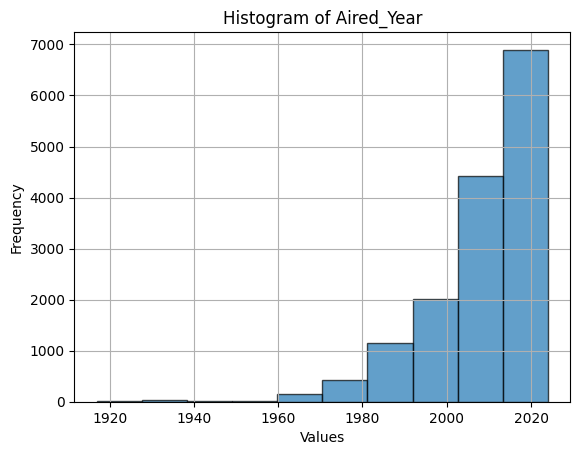

In [ ]:
df['Aired_Year'].plot(kind='hist', bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Aired_Year')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [49]:
# Calculate the median of the column
median_value = df['Aired_Year'].median()

# Fill the null values with the median
df['Aired_Year'].fillna(median_value, inplace=True)


In [52]:
unknown_counts = df.apply(lambda col: (col == 'Unknown').sum())



In [53]:
unknown_counts

Type                 2343
Episodes                0
Source               2538
Rating                 87
Score                   0
                     ... 
TMS Entertainment       0
Studio Deen             0
Pierrot                 0
OLM                     0
Other_Studios           0
Length: 77, dtype: int64

In [74]:
# Define the 'Unknown' string
custom_unknown_value = 'Unknown'

# Count the number of 'Unknown' values, NaN, and empty strings in each column
unknown_counts = df.apply(lambda col: col.isna().sum() + (col == '').sum() + (col == custom_unknown_value).sum())

print("Counts of 'Unknown' values, NaN, and empty strings in each column:")
print(unknown_counts)

# Identify columns with any 'Unknown', NaN, or empty strings
columns_with_unknowns = unknown_counts[unknown_counts > 0].index.tolist()

print("\nColumns with any 'Unknown' values, NaN, or empty strings:")
print(columns_with_unknowns)

Counts of 'Unknown' values, NaN, and empty strings in each column:
Unnamed: 0    0
Episodes      0
Rating        0
Score         0
Members       0
             ..
Movie         0
ONA           0
Special       0
TV Special    0
Other_Type    0
Length: 89, dtype: int64

Columns with any 'Unknown' values, NaN, or empty strings:
[]


In [65]:
df = pd.read_csv('test.csv')

In [66]:
df = df.drop(columns=['Popularity', 'Duration_Minutes_Category', 'Ranked', 'Members_Category', 'Popularity_Category'])

In [67]:
unknown_in_rating_count = (df['Aired_Month'] == 'Unknown').sum()

print("Number of 'Unknown' values in the 'Rating' column:")
print(unknown_in_rating_count)

Number of 'Unknown' values in the 'Rating' column:
1058


In [68]:
def filling_with_mode(df, column):
  mode = df[column].mode()[0]  # Get the mode (most frequent value)
  df[column] = df[column].replace('Unknown', mode)
  return df

df = filling_with_mode(df, 'Type')
df = filling_with_mode(df, 'Source')
df = filling_with_mode(df, 'Rating')
df = filling_with_mode(df, 'Aired_Season')
df = filling_with_mode(df, 'Aired_Day_of_Week')
df = filling_with_mode(df, 'Aired_Month')


In [69]:
df['Source'] = df['Source'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


# Step 2: Explode the 'Producers' and 'Staff' columns
producers_exploded = df['Source'].explode()


# Step 3: Count occurrences of each producer and staff member
top_producers = producers_exploded.value_counts().head(10)

# Step 4: Create binary columns for the top 10 producers
for producer in top_producers.index:
    df[producer] = df['Source'].apply(lambda x: 1 if producer in x else 0)



# Step 6: Create 'Other' columns
df['Other_Source'] = df['Source'].apply(lambda x: 1 if any(producer not in top_producers.index for producer in x) else 0)




In [72]:
df = df.drop(columns=['Source'])

In [70]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
df['Aired_Season'] = label_encoder.fit_transform(df['Aired_Season'])
df['Aired_Day_of_Week'] = label_encoder.fit_transform(df['Aired_Day_of_Week'])
df['Aired_Month'] = label_encoder.fit_transform(df['Aired_Month'])
df['Rating'] = label_encoder.fit_transform(df['Rating'])

In [73]:
df['Type'] = df['Type'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


# Step 2: Explode the 'Producers' and 'Staff' columns
producers_exploded = df['Type'].explode()


# Step 3: Count occurrences of each producer and staff member
top_producers = producers_exploded.value_counts().head(10)

# Step 4: Create binary columns for the top 10 producers
for producer in top_producers.index:
    df[producer] = df['Type'].apply(lambda x: 1 if producer in x else 0)



# Step 6: Create 'Other' columns
df['Other_Type'] = df['Type'].apply(lambda x: 1 if any(producer not in top_producers.index for producer in x) else 0)

df = df.drop(columns=['Type'])


In [76]:
df = df.drop(columns=['Unnamed: 0'])


## EDA

In [ ]:
# Apply the function to split the staff names and replace the original 'staff' column
df['staff'] = df['staff'].str.split(',')
df['Genres'] = df['Genres'].str.split(',')
df['Producers'] = df['Producers'].str.split(',')
df['Studios'] = df['Studios'].str.split(',')

In [ ]:
import pandas as pd

def print_top_items_by_mean_score(df, columns, score_col='Score', top_n=10):
    """
    Function to print the top `top_n` items by mean score for each specified column.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of columns to process (e.g., ['staff', 'Genres', 'Producers', 'Studios']).
    score_col (str): The column with scores (default is 'Score').
    top_n (int): The number of top items to consider (default is 10).
    """
    df_copy = df.copy()  # Make a copy of the original DataFrame

    for column in columns:
        # Split the specified column into lists
        #df_copy[column] = df_copy[column].str.split(',')

        # Sort the dataframe based on the score column
        df_sorted = df_copy.sort_values(score_col)

        # Flatten the list of items and reset the index
        items = df_sorted[column].explode().reset_index()

        # Group by item and calculate the mean score
        mean_scores = df_sorted.reset_index().groupby(items[column])[score_col].mean()

        # Get the top_n items with the highest mean score
        top_items = mean_scores.nlargest(top_n)

        # Print the top items and their mean scores
        print(f"Top {top_n} items for column '{column}':")
        print(top_items)
        print()


# Columns to process
columns_to_process = ['staff', 'Genres', 'Producers', 'Studios']

# Apply the function
print_top_items_by_mean_score(df, columns_to_process)


Top 10 items for column 'staff':
staff
 Papaya     9.06
Miki        9.02
Ogura       8.93
 Touma      8.92
 Koumura    8.90
Sanpei      8.88
 Kato       8.81
 Myoukan    8.79
Harao       8.79
 Matsumi    8.75
Name: Score, dtype: float64

Top 10 items for column 'Genres':
Genres
 Romance        6.773112
 Adventure      6.742228
 Drama          6.722412
Mystery         6.713514
Adventure       6.679357
 Fantasy        6.672272
 Boys Love      6.633333
 Mystery        6.630784
Supernatural    6.623636
Action          6.605254
Name: Score, dtype: float64

Top 10 items for column 'Producers':
Producers
Universal Radio Studio    8.98
M.S.C                     8.81
Marine Entertainment      8.76
Overlap                   8.70
 DMM.com Labo             8.68
 TIS                      8.68
 Delightworks             8.62
 3xCube                   8.56
 Kino Production          8.55
Antechinus                8.52
Name: Score, dtype: float64

Top 10 items for column 'Studios':
Studios
E&H Productio

In [ ]:
import pandas as pd

def get_top_items_binary_df(df, column, score_col='Score', top_n=10):
    """
    Function to get a new DataFrame with binary columns for the top `top_n` items by mean score.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column to process (e.g., 'Genres', 'Producers', 'Studios').
    score_col (str): The column with scores (default is 'Score').
    top_n (int): The number of top items to consider (default is 10).

    Returns:
    pd.DataFrame: A DataFrame with binary columns for the top `top_n` items.
    """

    # Sort the dataframe based on the score column
    df_sorted = df.sort_values(score_col)

    # Flatten the list of items and reset the index
    items = df_sorted[column].explode().reset_index()

    # Group by item and calculate the mean score
    mean_scores = df_sorted.reset_index().groupby(items[column])[score_col].mean()

    # Get the top_n items with the highest mean score
    top_items = mean_scores.nlargest(top_n).index

    # Create a new DataFrame with binary columns for each of the top items
    binary_df = pd.DataFrame(index=df.index)

    for item in top_items:
        binary_df[item] = df[column].apply(lambda x: 1 if item in x else 0)

    return binary_df


# Apply the function to 'staff'
staff_binary_df = get_top_items_binary_df(df, 'staff')
print("Top staff Binary DataFrame:\n", staff_binary_df)

# Apply the function to 'Genres'
genres_binary_df = get_top_items_binary_df(df, 'Genres')
print("Top Genres Binary DataFrame:\n", genres_binary_df)

# Apply the function to 'Producers'
producers_binary_df = get_top_items_binary_df(df, 'Producers')
print("Top Producers Binary DataFrame:\n", producers_binary_df)

# Apply the function to 'Studios'
studios_binary_df = get_top_items_binary_df(df, 'Studios')
print("Top Studios Binary DataFrame:\n", studios_binary_df)


Top staff Binary DataFrame:
         Papaya  Miki  Ogura   Touma   Koumura  Sanpei   Kato   Myoukan  Harao  \
0            0     0      0       0         0       0      0         0      0   
1            0     0      0       0         0       0      0         0      0   
2            0     0      0       0         0       0      0         0      0   
3            0     0      0       0         0       0      0         0      0   
4            0     0      0       0         0       0      0         0      0   
...        ...   ...    ...     ...       ...     ...    ...       ...    ...   
17155        0     0      0       0         0       0      0         0      0   
17156        0     0      0       0         0       0      0         0      0   
17157        0     0      0       0         0       0      0         0      0   
17158        0     0      0       0         0       0      0         0      0   
17159        0     0      0       0         0       0      0         0      0   

###Fill the null values in rank with interpolate function

In [ ]:
import matplotlib.pyplot as plt


df_copy = df.copy()
df_copy['Ranked'] = df_copy['Ranked'].interpolate(method='linear')


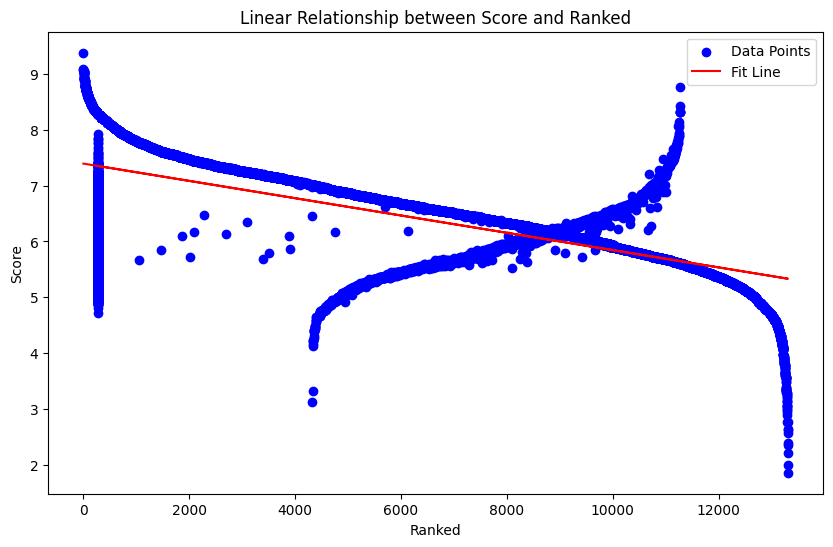

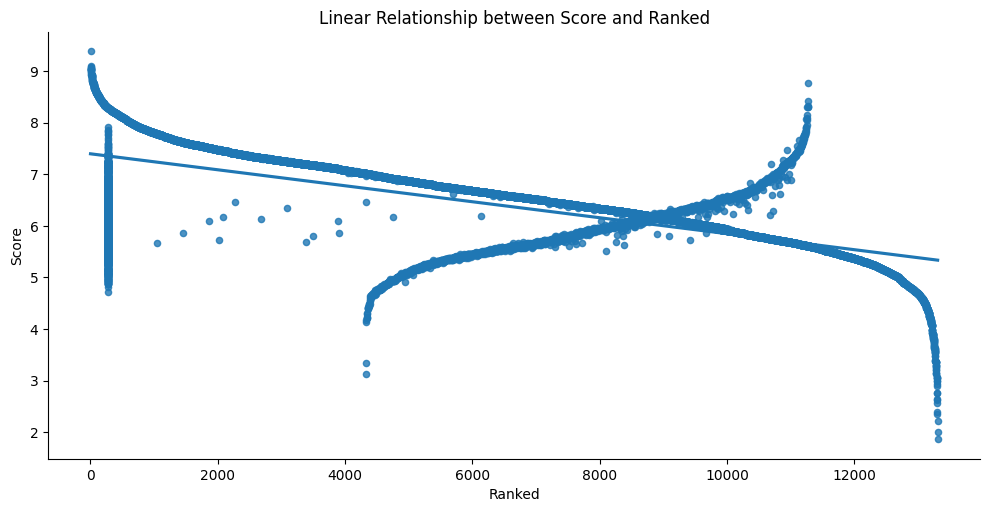

In [ ]:
# Using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['Ranked'], df_copy['Score'], color='blue', label='Data Points')
m, b = np.polyfit(df_copy['Ranked'], df_copy['Score'], 1)
plt.plot(df_copy['Ranked'], m * df_copy['Ranked'] + b, color='red', label='Fit Line')
plt.xlabel('Ranked')
plt.ylabel('Score')
plt.title('Linear Relationship between Score and Ranked')
plt.legend()
plt.show()

# Using Seaborn
sns.lmplot(x='Ranked', y='Score', data=df_copy, aspect=2, scatter_kws={'s':20})
plt.xlabel('Ranked')
plt.ylabel('Score')
plt.title('Linear Relationship between Score and Ranked')
plt.show()

### Fill the null values in rank with median

In [ ]:
df_copy = df.copy()

# Calculate the median of the numeric values in the 'Ranked' column
median = df_copy['Ranked'].median()

# Fill NaN values in the 'Ranked' column with the median
df_copy['Ranked'].fillna(median, inplace=True)


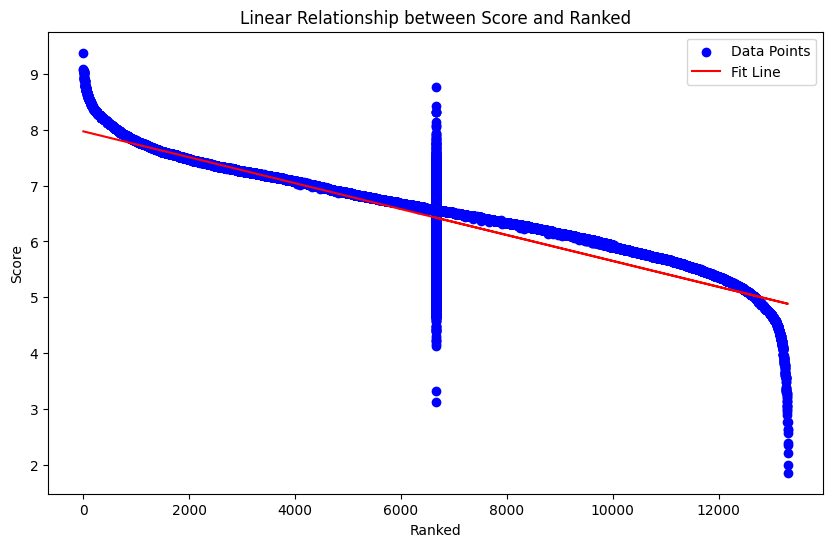

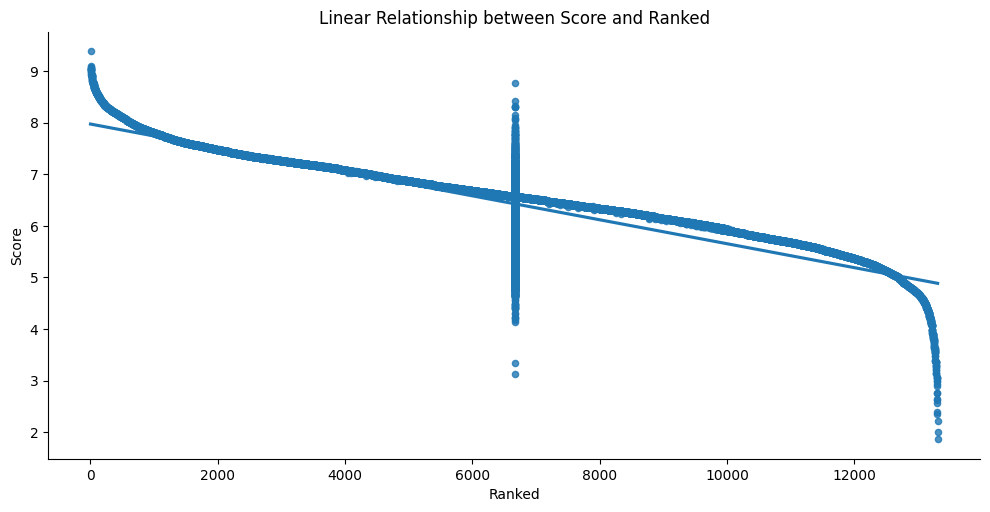

In [ ]:
# Using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['Ranked'], df_copy['Score'], color='blue', label='Data Points')
m, b = np.polyfit(df_copy['Ranked'], df_copy['Score'], 1)
plt.plot(df_copy['Ranked'], m * df_copy['Ranked'] + b, color='red', label='Fit Line')
plt.xlabel('Ranked')
plt.ylabel('Score')
plt.title('Linear Relationship between Score and Ranked')
plt.legend()
plt.show()

# Using Seaborn
sns.lmplot(x='Ranked', y='Score', data=df_copy, aspect=2, scatter_kws={'s':20})
plt.xlabel('Ranked')
plt.ylabel('Score')
plt.title('Linear Relationship between Score and Ranked')
plt.show()

In [ ]:
#df.to_csv('/content/drive/My Drive/project_DS/final_df.csv', index=False)
